# Analysis of E-commerce Conversion Funnel 
# by Beata Wotoch, 9 February 2021

### Instructions: 
You are the growth analyst for an e-commerce site. The company CEO isn't very happy with the volume of sales and, especially, of sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
### Objective: 
Come up with insights to improve the conversion rate, especially among new users

### Data Source: 
https://www.kaggle.com/aerodinamicc/ecommerce-website-funnel-analysis

### Disclaimer: 
This data is fictional

## Importing the libraries and loading the datasets

In [490]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [491]:
df_user = pd.read_csv('user_table.csv')
df_home = pd.read_csv('home_page_table.csv')
df_search = pd.read_csv('search_page_table.csv')
df_payment = pd.read_csv('payment_page_table.csv')
df_confirmation = pd.read_csv('payment_confirmation_table.csv')

### Renaming the columns and replacing the values with dummy variables

In [395]:
df.head()

,number,stage,Gender
0,45325,Homepage visits,Male
1,22524,Search,Male
2,2930,Payment,Male
3,211,Conversion,Male
0,45075,Homepage visits,Female


In [396]:
df_home['home_page'] = df_home['page']
df_home.drop(columns='page', inplace=True)

In [397]:
df_home['home_page'] = pd.get_dummies(df_home['home_page'])
df_home

,user_id,home_page
0,313593,1
1,468315,1
2,264005,1
3,290784,1
4,639104,1
...,...,...
90395,456851,1
90396,128619,1
90397,167290,1
90398,437765,1


In [398]:
df_search.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [400]:
df_search['search_page'] = df_search['page']
df_search.drop(columns='page', inplace=True)
df_search['search_page'] = pd.get_dummies(df_search['search_page'])
df_search.head()


,user_id,search_page
0,15866,1
1,347058,1
2,577020,1
3,780347,1
4,383739,1


In [401]:
df_payment['payment_page'] = df_payment['page']
df_payment.drop(columns='page', inplace=True)
df_payment['payment_page'] = pd.get_dummies(df_payment['payment_page'])
df_payment.head()

,user_id,payment_page
0,253019,1
1,310478,1
2,304081,1
3,901286,1
4,195052,1


In [402]:
df_confirmation['confirmation_page'] = df_confirmation['page']
df_confirmation.drop(columns='page',inplace=True)
df_confirmation['confirmation_page'] = pd.get_dummies(df_confirmation['confirmation_page'])
df_confirmation.head()

,user_id,confirmation_page
0,123100,1
1,704999,1
2,407188,1
3,538348,1
4,841681,1


### Merging the tables and doing EDA

In [420]:
df = df_user.merge(df_home, on='user_id', how='outer').merge(df_search, on='user_id',how='outer').merge(df_payment,on='user_id',how='outer').merge(df_confirmation,on='user_id',how='outer')

In [404]:
df.describe()

,user_id,home_page,search_page,payment_page,confirmation_page
count,90400.000000,90400.0,45200.0,6030.0,452.0
mean,498709.683473,1.0,1.0,1.0,1.0
std,289040.674085,0.0,0.0,0.0,0.0
min,17.000000,1.0,1.0,1.0,1.0
25%,247978.750000,1.0,1.0,1.0,1.0
50%,498267.000000,1.0,1.0,1.0,1.0
75%,749789.250000,1.0,1.0,1.0,1.0
max,999979.000000,1.0,1.0,1.0,1.0


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            90400 non-null  int64  
 1   date               90400 non-null  object 
 2   device             90400 non-null  object 
 3   sex                90400 non-null  object 
 4   home_page          90400 non-null  uint8  
 5   search_page        45200 non-null  float64
 6   payment_page       6030 non-null   float64
 7   confirmation_page  452 non-null    float64
dtypes: float64(3), int64(1), object(3), uint8(1)
memory usage: 5.6+ MB


In [406]:
df.isnull().sum() #Checking for missing values

user_id                  0
date                     0
device                   0
sex                      0
home_page                0
search_page          45200
payment_page         84370
confirmation_page    89948
dtype: int64

In [407]:
df=df.fillna(0) # Filling the missing values with 0s

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            90400 non-null  int64  
 1   date               90400 non-null  object 
 2   device             90400 non-null  object 
 3   sex                90400 non-null  object 
 4   home_page          90400 non-null  uint8  
 5   search_page        90400 non-null  float64
 6   payment_page       90400 non-null  float64
 7   confirmation_page  90400 non-null  float64
dtypes: float64(3), int64(1), object(3), uint8(1)
memory usage: 5.6+ MB


In [409]:
df['user_id'].unique()

array([450007, 756838, 568983, ..., 659645, 359779, 438929], dtype=int64)

In [410]:
df.sort_values(by='date') #Sorting values by date to check the timespan of the data

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
44634,602817,2015-01-01,Desktop,Male,1,0.0,0.0,0.0
62649,653429,2015-01-01,Desktop,Male,1,0.0,0.0,0.0
30040,701366,2015-01-01,Desktop,Male,1,0.0,0.0,0.0
30049,309933,2015-01-01,Desktop,Female,1,0.0,0.0,0.0
34436,574869,2015-01-01,Desktop,Male,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
87669,192832,2015-04-30,Desktop,Male,1,1.0,0.0,0.0
66077,199833,2015-04-30,Mobile,Female,1,0.0,0.0,0.0
6734,282091,2015-04-30,Mobile,Female,1,1.0,0.0,0.0
77283,900297,2015-04-30,Desktop,Male,1,1.0,0.0,0.0


<AxesSubplot:xlabel='sex', ylabel='count'>

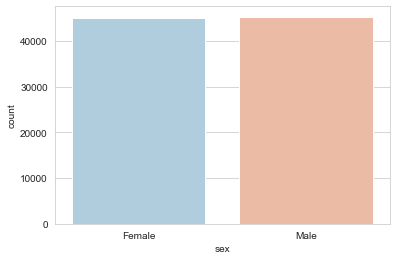

In [494]:
sns.countplot(x=df['sex'],data=df, palette='RdBu_r') # roughly equal distribution between sexes

<AxesSubplot:xlabel='device', ylabel='count'>

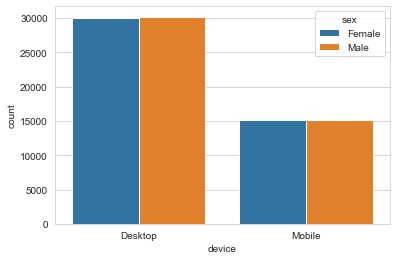

In [496]:
sns.countplot(x=df['device'], hue='sex', data=df) # roughly equal distribution between sexes 

### Printing the total observations for each column and creating a conversion funnel with Plotly

In [411]:
print(len(df['home_page']))
print(len(df[df['search_page']==1]))
print(len(df[df['payment_page']==1]))
print(len(df[df['confirmation_page']==1]))

90400
45200
6030
452


In [515]:
import plotly.express as px
data = dict(
    number=[90400, 45200, 6030, 452],
    stage=["Homepage visits", "Search", "Payment", "Conversion"])
fig = px.funnel(data, x='number', y='stage', title='Conversion funnel (Jan-Apr 2015)',text=['100%','50%', '7%', '0.5%'], color_discrete_sequence=['skyblue'])
fig.show()

### Creating a table with occurances per gender and plotting a conversion funnel

In [413]:
#Funnel per gender

stage_1_f = df[(df['sex']=='Female')]
stage_1_m = df[(df['sex']=='Male')]
stage_2_f = df[(df['sex']=='Female')&(df['search_page']==1)]
stage_2_m = df[(df['sex']=='Male')&(df['search_page']==1)]
stage_3_f = df[(df['sex']=='Female')&(df['payment_page']==1)]
stage_3_m = df[(df['sex']=='Male')&(df['payment_page']==1)]
conversion_f = df[(df['sex']=='Female')&(df['confirmation_page']==1)]
conversion_m = df[(df['sex']=='Male')&(df['confirmation_page']==1)]

In [414]:
df_gender = [['Phases', 'Male', 'Female'],
               ['Homepage visit', stage_1_m.count(), stage_1_fem.count()],
               ['Search', stage_2_m.count(), stage_2_f.count()],
               ['Payment', stage_3_m.count(), stage_3_f.count()],
               ['Conversion', conversion_m.count(), conversion_f.count()]]


In [415]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
table = ff.create_table(df_gender)
iplot(table)

In [422]:
stages=["Homepage visits", "Search", "Payment", "Conversion"]
df_m = pd.DataFrame(dict(number=[45325,22524,2930,211], stage=stages))
df_m['Gender'] = 'Male'
df_f = pd.DataFrame(dict(number=[45075,22676,3100,241], stage=stages))
df_f['Gender'] = 'Female'
df_sex = pd.concat([df_m, df_f], axis=0)
fig = px.funnel(df_sex, x='number', y='stage', color='Gender')
fig.show()

### Creating a table devided by device and plotting a conversion funnel

In [424]:
#Funnel per device

stage_1_desk = df[(df['device']=='Desktop')]
stage_1_mob = df[(df['device']=='Mobile')]
stage_2_desk = df[(df['device']=='Desktop')&(df['search_page']==1)]
stage_2_mob = df[(df['device']=='Mobile')&(df['search_page']==1)]
stage_3_desk = df[(df['device']=='Desktop')&(df['payment_page']==1)]
stage_3_mob = df[(df['device']=='Mobile')&(df['payment_page']==1)]
conversion_desk = df[(df['device']=='Desktop')&(df['confirmation_page']==1)]
conversion_mob = df[(df['device']=='Mobile')&(df['confirmation_page']==1)]

In [427]:
df_device = [['Phases', 'Mobile', 'Desktop'],
               ['Homepage visit', stage_1_mob.count(), stage_1_desk.count()],
               ['Search', stage_2_mob.count(), stage_2_desk.count()],
               ['Payment', stage_3_mob.count(), stage_3_desk.count()],
               ['Conversion', conversion_mob.count(), conversion_desk.count()]]


In [428]:

table = ff.create_table(df_device)
iplot(table)

In [516]:
stages=["Homepage visits", "Search", "Payment", "Conversion"]
df_mob = pd.DataFrame(dict(number=[30200,15100,3020,302], stage=stages))
df_mob['Device'] = 'Mobile'
df_desk = pd.DataFrame(dict(number=[60200,30100,3010,150], stage=stages))
df_desk['Device'] = 'Desktop'
df_dev = pd.concat([df_mob, df_desk], axis=0)
fig = px.funnel(df_dev, x='number', y='stage', color='Device', color_discrete_sequence=['gray','blue'], title='Total Conversions per Device')
fig.show()

### Comparing conversion rate per month

Here I want to find out if there is any difference in conversion between the months

In [370]:
jan_users = df[df['date']<='2015-01-31']
jan_users.sort_values(by='date')

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
10273,622819,2015-01-01,Desktop,Female,1,1.0,0.0,0.0
16793,981466,2015-01-01,Desktop,Female,1,0.0,0.0,0.0
64824,532835,2015-01-01,Mobile,Male,1,1.0,0.0,0.0
16851,807301,2015-01-01,Desktop,Male,1,0.0,0.0,0.0
35750,479023,2015-01-01,Desktop,Female,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
46940,453386,2015-01-31,Mobile,Male,1,1.0,0.0,0.0
74046,598374,2015-01-31,Desktop,Male,1,1.0,0.0,0.0
28750,265310,2015-01-31,Desktop,Female,1,1.0,1.0,0.0
73918,532649,2015-01-31,Desktop,Male,1,0.0,0.0,0.0


In [371]:
print(len(jan_users['home_page']))
print(len(jan_users[jan_users['search_page']==1]))
print(len(jan_users[jan_users['payment_page']==1]))
print(len(jan_users[jan_users['confirmation_page']==1]))

22600
13554
2390
189


In [483]:
data = dict(
    number=[22600, 13554, 2390, 189],
    stage=["Homepage visits", "Search", "Payment", "Conversion"])
fig = px.funnel(data, x='number', y='stage', title='Conversion funnel Jan 2015', width= 600, text = ['100%','60%','11%','0.8%'], color_discrete_sequence=['green'])
fig.show()

In [376]:
feb_users = df[(df['date']>='2015-02-01')&(df['date']<='2015-02-28')]
feb_users.sort_values(by='date')

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
54024,181986,2015-02-01,Mobile,Female,1,1.0,0.0,0.0
69417,376948,2015-02-01,Desktop,Male,1,0.0,0.0,0.0
30968,931524,2015-02-01,Mobile,Female,1,1.0,0.0,0.0
63432,465236,2015-02-01,Desktop,Female,1,0.0,0.0,0.0
45309,830868,2015-02-01,Desktop,Female,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
47430,846714,2015-02-28,Mobile,Female,1,1.0,0.0,0.0
87411,632752,2015-02-28,Desktop,Male,1,1.0,0.0,0.0
87417,327594,2015-02-28,Mobile,Female,1,0.0,0.0,0.0
46545,89142,2015-02-28,Desktop,Male,1,0.0,0.0,0.0


In [377]:
print(len(feb_users['home_page']))
print(len(feb_users[feb_users['search_page']==1]))
print(len(feb_users[feb_users['payment_page']==1]))
print(len(feb_users[feb_users['confirmation_page']==1]))

22600
13687
2412
173


In [378]:
mar_users = df[(df['date']>='2015-03-01')&(df['date']<='2015-03-31')]
mar_users.sort_values(by='date')

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
54799,505610,2015-03-01,Mobile,Female,1,0.0,0.0,0.0
9934,423916,2015-03-01,Desktop,Male,1,0.0,0.0,0.0
49981,603621,2015-03-01,Desktop,Male,1,0.0,0.0,0.0
78018,815557,2015-03-01,Desktop,Male,1,0.0,0.0,0.0
77971,161386,2015-03-01,Desktop,Female,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
85611,440793,2015-03-31,Mobile,Female,1,0.0,0.0,0.0
63264,651636,2015-03-31,Desktop,Male,1,1.0,0.0,0.0
1945,638270,2015-03-31,Mobile,Female,1,0.0,0.0,0.0
62815,618066,2015-03-31,Mobile,Female,1,0.0,0.0,0.0


In [379]:
print(len(mar_users['home_page']))
print(len(mar_users[mar_users['search_page']==1]))
print(len(mar_users[mar_users['payment_page']==1]))
print(len(mar_users[mar_users['confirmation_page']==1]))

22600
8879
631
44


In [368]:
new_users = df[df['date']>='2015-04-01']
new_users.sort_values(by='date')

,user_id,date,device,sex,home_page,search_page,payment_page,confirmation_page
82765,594505,2015-04-01,Desktop,Male,1,0.0,0.0,0.0
22543,880626,2015-04-01,Desktop,Male,1,0.0,0.0,0.0
2143,549938,2015-04-01,Desktop,Male,1,0.0,0.0,0.0
39244,527411,2015-04-01,Desktop,Male,1,0.0,0.0,0.0
59679,99706,2015-04-01,Desktop,Female,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
46944,876261,2015-04-30,Desktop,Female,1,0.0,0.0,0.0
54889,485052,2015-04-30,Desktop,Female,1,1.0,0.0,0.0
84500,344986,2015-04-30,Desktop,Male,1,0.0,0.0,0.0
79756,96726,2015-04-30,Mobile,Female,1,0.0,0.0,0.0


In [369]:
print(len(new_users['home_page']))
print(len(new_users[new_users['search_page']==1]))
print(len(new_users[new_users['payment_page']==1]))
print(len(new_users[new_users['confirmation_page']==1]))

22600
9080
597
46


In [481]:
data = dict(
    number=[22600, 9080, 597, 46],
    stage=["Homepage visits", "Search", "Payment", "Conversion"])
fig = px.funnel(data, x='number', y='stage', title='Conversion funnel Apr 2015', width= 600, text=['100%','40%','3%','0.2%'], color_discrete_sequence=['red'])
fig.show()

### Insights
- The conversion is higher in Jan and Feb than in Mar and Apr
- More users convert using mobile device, even though more visitors browse the website on the desktop
- No significant difference in conversion between genders

### Recommendations
- Since most of the users use desktop device, investing more time in improving the desktop version would generate more turnover
- The drop in conversions in March, could've been caused by some major changes to the website, so it would be wise to revise it